# Comparando K-N-N e SVMs para classificação de animais a partir do HOG
###### Guilherme Stoppa Caulada

#### Abstract
This project analyses how the algorithm k-nearest neighbors, also called knn, performs when compared to support vector machines (SVM) when classifying animals using the histogram of oriented gradients generated from their images. The histogram of oriented gradients, or HOG, is a feature descriptor, comonly utilized in visual computing for the purpose of object detection.

#### Resumo
Esse projeto analisa como o algoritmo k-vizinhos mais proximos, também chamado de knn, performa quando comparado com maquinas de vetores de suporte (SVM) para a classificação de animais utilizando o histograma de gradientes orientados gerado por suas imagens. O histograma de gradientes orientados, ou HOG, descreve caracteristicas da imagem, e é comumente utilizado em computação visual para detecção de objetos.

Palavras-chave: classificação, scikit, knn, svm, imagens

## Introdução
A classificação de imagens é um problema de aprendizegem de maquina supervisionado, definimos um grupo de objetos, ou no caso animais, a serem reconhecidos em imagens, e treinamos um modelo para identifica-los de acordo com a classificação das imagens que foram utilizado durante o treinamento. O algoritmo k-vizinhos mais proximos, ou knn, é um dos algoritmos mais simples utilizados para classificação e um dos algoritmos de aprendizagem de maquina mais utilizados, este projeto busca comparar a performance desse algoritmo com a performance de algoritmos que utilizam maquinas de vetores de suporte, ou svm, quando utilizados em conjunto com o histograma de gradientes orientados para a classificação de imagens.

## Referencial Teórico
O algoritmo k-vizinhos mais proximos é um dos algoritmos de aprendizagem de maquina mais utilizados em diversas areas, ele pode ser utilizado para problemas de classificação e regressão. Esse algoritmo utiliza os proprios dados para determinar a estrutura do modelo. Todos os dados de treino sao utilizados na fase de teste, isso requer mais tempo e memoria. Esse algoritmo seleciona K elementos com valores mais proximos do elemento alvo sendo analisado e o classifica de acordo com a classificação da maioria de seus "vizinhos".

Uma maquina de vetores de suporte é um tipo de algoritmo de classificação que define um hiperplano em um plano multidimensional que separa os elementos de categorias diferentes, em um espaço bi-dimensional esse hiperplano é representado por uma linha. Podemos utilizar dois métodos na execução deste algoritmo, um deles, o mais demorado, tenta encontrar a divisão perfeita dos dados com varios hiperplanos separando diferentes pontos dos dados, e outra maneira mais rapida, seria encontrar um plano aproximado que represente todos estes planos, possuindo uma certa tolerancia a erros. SGDs são SVMs que utilizam o método do gradiente para a criação de seus hiperplanos, o método da gradiente é método numérico utilizado em optimização que encontra um ponto minimo de uma função a partir de um esquema iterativo, onde em cada passo se toma uma direção contraria a do gradiente, este algoritmo pode ser rapidamente treinado e possui resultados aproximados aos que seriam obtidos utilizando uma maquina de vetores de suporte mais estrita como a SVC.

O histograma de gradientes orientados é utilizado para descrever certas caracteristicas acentuadas de uma imagem, ele simplifica o problema extraindo as informações mais importantes da imagem, ignorando o resto. Para a tarefa de classificação os pontos mais importantes da imagem estão em seus contornos, o HOG é utilizado para extrair informações sobre as bordas e contornos na imagem aondem encontramos uma mudança de intensidade abrupta. Para calcular o HOG, a imagem é dividida em blocos, por exemplo de 8 por 8 pixels, para cada um desses blocos é calculada a magnitude do gradiente em uma certa direção analisando os pixels presente no bloco, cada pixel possui um gradiente em uma certa direção e magnitude, a combinação linear de todos estes gradientes define o gradiente linear do bloco. Após criarmos o histograma é necessario normalizar seus valores, para isso devemos dividir todos os valores do histograma pela raiz da soma dos quadrados de seus valores originais, esses novos valores gerados a partir dessa divisão representam o histograma normalizado. Histogramas de gradientes orientados são classicamente utilizados em conjunto com SVMs para resolver problemas de reconhecimento de objetos.

## Proposta de Pesquisa
Este projeto analisa e compara a performance de algoritmos de classificação quando utilizados em conjunto com o histograma de gradientes orientados para o reconhecimento de animais em imagens buscando gerar maior conhecimento sobre estas técnicas de computação visual, aprendizagem de maquina e reconhecimento de imagens.

## Metodologia
Este projeto utiliza imagens de animais adquiridas no link https://www.kaggle.com/alessiocorrado99/animals10. As imagens pertencem a 10 categorias que representam em ingles os animais: cachorro, gato, cavalo, aranha, borboleta, galinha, ovelha, vaca, esquilo e elefante. Estas imagens foram processadas em um *Dataframe* da biblioteca *pandas* com 28266 registros e 4 variaveis, ID, LABEL, FILE, e IMG, sem a existencia de qualquer valor ausente. No *Dataframe* encontramos uma media de 2826.6 imagens em cada grupo, e uma mediana de 2251.5 imagens em cada grupo, o grupo *spider* (aranha) apresenta a maior quantidade de imagens.

Abaixo apresentamos uma analise descritiva do *Dataframe*:

### Analise descritiva

#### Fonte dos dados:

Kaggle: https://www.kaggle.com/alessiocorrado99/animals10

#### Caracteristicas gerais:

* **Numero de registros:** 28266

* **Quantidade de variaveis:** 4

* **Dicionario de dados:**
    * **ID:** Id da imagem
    * **LABEL:** Categoria da imagem
    * **FILE:** Nome do arquivo da imagem
    * **IMG:** Imagem em RGB
   
* **Quantidade de valores ausentes por variavel:**
    * **ID:** N/A
    * **LABEL:** N/A
    * **FILE:** N/A
    * **IMG:** N/A
    
    
#### Analise descritiva das variaveis:

* **Dominio**:
    * **ID:** \[1 - 28266\]
    * **LABEL:** \[dog, cat, horse, spider, butterfly, chicken, sheep, cow, squirrel, elephant\]
* **Medidas de tendencia:**
    * **Media:** 2826.6 (media da quantidade de imagens em cada grupo)
    * **Mediana:** 2251.5 (mediana da quantidade de imagens em cada grupo)
    * **Moda:** 'spider' (grupo com maior quantidade de imagens)
* **Medidas de dispercao:** 
    * **Desvio Padrao:** 1231.845 (desvio padrao da quantidade de imagens em cada grupo)

### 1. Bibliotecas
Para completar o projeto foram utilizadas diversas bibliotecas para manipulação de dados, aprendizagem de maquina, multi-processamento e formatação.

As mais importantes:
- *numpy* - utilizada para a manipulação de vetores
- *pandas* - utilizada para a criação e manipulação de *Dataframes*
- *sklearn* - utilizadas para aprendizagem de maquina
- *skimage* e *cv2* - utilizadas para a manipulação de imagens
- *multiprocessing* - utilizada na paralelização do código
- *mayplotlib* - utilizada para desenhar graficos

In [1]:
# Libraries for data manipulation
import os
import time
import numpy as np
import pandas as pd
from scipy import stats

# Libraries for machine learning
from sklearn import tree
from skimage.io import imread
from skimage.feature import hog
from sklearn import preprocessing
from skimage.transform import rescale, resize
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn import svm
import skimage
import cv2

# Libraries for multi-processing
import multiprocessing as mp

# Libraries for display formatting
import pydotplus
from graphviz import Source
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import clear_output, display
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Os marcadores **%matplotlib** e **%%javascript** definem apenas opções de visualização de output do jupyter-notebook.

### 2. Funções
Com o inicio da analise logo percebemos que seria inviavel realizar este processo sequencialmente durante o desenrolar do projeto, então foram definidas funções que seriam executadas paralelamente e funções que poderiam ser executadas sequancialmente.

Para aumentar ainda mais a velocidade do processo de análise de imagens e pré-processamento de dados, assim como a velocidade do treinamento do algoritmo de aprendizado, foi adquirida uma máquina virtual na Google Cloud com 32 cores e 120 Gb de memória RAM.

#### 2.1. Funções paralelas
Utilizamos a função load_image para carregar as imagens, a função load_hog para gerar o histograma de gradientes orientados da imagem e a função make_square para reajustar todas as imagens para um mesmo tamanho sem que haja deformação. Todas essas funções seram chamadas paralelamente com o decorrer do projeto, utilizando uma *pool* de processos do mesmo tamanho que a quantidade de cores da máquina.

In [3]:
def load_image(i,dir,img):
        return [i,dir,img,imread("animals/{}/{}".format(dir,img))]
    
def load_hog(img,opt):
    return hog(img,orientations=opt['orientations'],
          pixels_per_cell=opt['pixels_per_cell'],
          cells_per_block=opt['cells_per_block'],
          visualise=opt['visualise'],
          block_norm=opt['block_norm'])
    
def make_square(im, size):
    border_v = 0
    border_h = 0
    if 1 >= (im.shape[0]/im.shape[1]):
        border_v = int(((im.shape[1])-im.shape[0])/2)
    else:
        border_h = int(((im.shape[0])-im.shape[1])/2)
    img = cv2.copyMakeBorder(im, border_v, border_v, border_h, border_h, cv2.BORDER_CONSTANT, 0)
    img = cv2.resize(img, (size, size))
    return img

pool = mp.Pool(processes=mp.cpu_count())

#### 2.2. Funções comuns
Utilizamos a função load_images para construir o *Dataframe* a partir das imagens carregadas paralelamente pela função load_image. As funções plot_bar e plot_confusion_matrix são utilizadas em conjunto para construir um grafico da matriz de confusão.

In [4]:
def load_images():
    labels = np.array(os.listdir("animals"))
    results = []
    images = []
    meta = []
    
    i = 0
    for dir in labels:
        a = 0
        files = os.listdir("animals/"+dir)
        for img in files:
            if isinstance(img,str):
                i = i + 1
                a = a + 1
                results = results + [pool.apply_async(load_image, [i,dir,img])]
        meta = meta + [[dir, a]]
    
    images = [r.get() for r in results]
    return labels, pd.DataFrame(images, columns=['ID','LABEL','FILE','IMG']), pd.DataFrame(meta, columns=['LABEL','AMOUNT'])

def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5

    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]

    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'

    xtemp = np.arange(len(unique))

    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique)
    plt.xlabel('animal type')
    plt.ylabel(ylabel_text)
    
def plot_confusion_matrix(cmx, vmax1=None, vmax2=None, vmax3=None):
    cmx_norm = 100*cmx / cmx.sum(axis=1, keepdims=True)
    cmx_zero_diag = cmx_norm.copy()

    np.fill_diagonal(cmx_zero_diag, 0)

    fig, ax = plt.subplots(ncols=3)
    fig.set_size_inches(12, 3)
    [a.set_xticks(range(10)) for a in ax]
    [a.set_yticks(range(10)) for a in ax]

    im1 = ax[0].imshow(cmx, vmax=vmax1)
    ax[0].set_title('as is')
    im2 = ax[1].imshow(cmx_norm, vmax=vmax2)
    ax[1].set_title('%')
    im3 = ax[2].imshow(cmx_zero_diag, vmax=vmax3)
    ax[2].set_title('% and 0 diagonal')

    fig.colorbar(im1, ax=ax[0])
    fig.colorbar(im2, ax=ax[1])
    fig.colorbar(im3, ax=ax[2])
    fig.tight_layout()

### 3. Carregamento de imagens
Após carregarmos as imagens exibimos alguns dados que descrevem a quantidade de animais em cada grupo.

In [5]:
labels, imgs, meta = load_images()
print(meta)

       LABEL  AMOUNT
0     spider    5133
1      sheep    1942
2   elephant    1483
3        dog    4908
4   squirrel    2013
5        cow    2039
6      horse    2672
7        cat    1941
8    chicken    3671
9  butterfly    2464


### 4. Medidas de tendencia central
A partir destes valores extraimos algumas informações sobre os dados, como a média (mean) e médiana (median) da quantidade de imagens, qual grupo possui a maior quantidade de imagens (modal), e qual o desvio padrão da quantidade de imagens em cada grupo (STD).

In [6]:
amounts = meta.AMOUNT.values
imgs_labels = imgs.LABEL.values
print('Mean: '+str(np.mean(amounts))+'    Median:'+str(np.median(amounts))+'    Modal:'+str(stats.mode(imgs_labels, axis=None).mode)+'    STD:'+str(np.std(amounts)))

Mean: 2826.6    Median:2251.5    Modal:['spider']    STD:1231.8450551916014


### 5. Pré-processamento
Para processar essas imagens em dados descritivos que possam ser utilizados na categorização das imagens precisamos passar a imagem por diferentes processos.

#### 5.1. Visualização
Primeiramente exibimos uma imagem de cada grupo para visualizar os dados que serão processados.

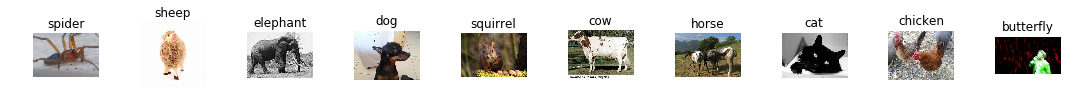

In [7]:
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()

# make a plot for every label (equipment) type. The index method returns the 
# index of the first item corresponding to its search string, label in this case
for ax, label in zip(axes, labels):
    ax.imshow(imgs[imgs.LABEL == label].iloc[-1].IMG)
    ax.axis('off')
    ax.set_title(label)

#### 5.2. Treino e teste
Em seguida dividimos nosso *Dataframe* em imagens para teste e imagens para treino, possuindo aproximadamente a mesma porcentagem de animais em cada grupo.

In [8]:
X = np.array(imgs.IMG.values)
y = np.array(imgs.LABEL.values)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=42,
)

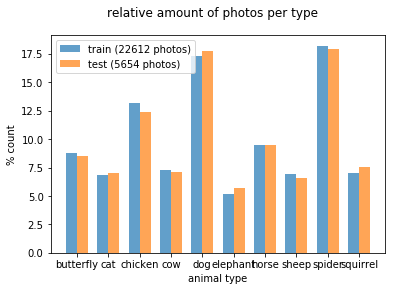

In [9]:
plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)),
    'test ({0} photos)'.format(len(y_test))
]);

#### 5.3. Histograma de Gradientes (HOG)
Uma forma classica de se reconhecer objetos é adquirindo-se o histograma de gradientes da imagem.
Para calcular um HOG uma imagem é dividida em blocos, para cada bloco é calculado uma magnitude para o gradiente em um dado numero de direções. Consiguimos representar o HOG de uma imagem com uma outra imagem.

Nesta parte do projeto geramos o HOG de uma imagem para verificar os passos necessarios para adquirir essa infromação e exibimos a representação do HOG em formato de imagem para facilitar a visualização e entendimento destes dados.

number of pixels:  67500
number of hog features:  21546


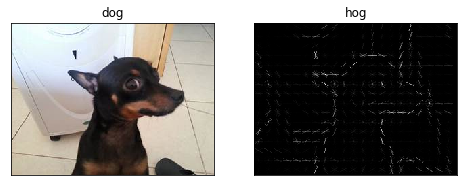

In [10]:
dog = imgs[imgs.LABEL == 'dog'].iloc[-1].IMG
# calculate the hog and return a visual representation.
dog_hog, dog_hog_img = hog(
    skimage.color.rgb2gray(dog), pixels_per_cell=(14, 14),
    cells_per_block=(3,3),
    orientations=9,
    visualise=True,
    block_norm='L2-Hys')

fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)
# remove ticks and their labels
[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
    for a in ax]

print('number of pixels: ', dog.shape[0] * dog.shape[1])
print('number of hog features: ', dog_hog.shape[0])

ax[0].imshow(dog, cmap='gray')
ax[0].set_title('dog')
ax[1].imshow(dog_hog_img, cmap='gray')
ax[1].set_title('hog')
plt.show()

#### 5.4. Transformadores
Ao gerar HOG da primeira imagem foi identificado que seria necessario primeiramente converter todas as imagens para tons de cinza e garantir que todos as dimensoes são iguais, para em seguida consiguimos gerar o HOG. Isso é necessario para que todas as imagens possuam a mesma quantidade de caracteristicas atribuidas a elas.

Como precisamos fazer isso para todas as imagens, foram criados "Transformadores" que realizam essas operações para todos os elementos de uma lista.

In [12]:
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of RGB images to grayscale
    """

    def __init__(self):
        pass

    def fit(self, X, y=None):
        """returns itself"""
        return self

    def transform(self, X, y=None):
        results = []
        for img in X:
            results = results + [pool.apply_async(skimage.color.rgb2gray, [img])]     
            
        rr = []
        for r in results:
            rr = rr + [r.get()]
        
        return np.array(rr)

class SquareTransformer(BaseEstimator, TransformerMixin):
    """
    Convert an array of grayscale images to same size square
    """

    def __init__(self, size=256, y=None):
        self.y = y
        self.size = size

    def fit(self, X, y=None):
        """returns itself"""
        return self

    def transform(self, X, y=None):
        results = []
        for img in X:
            results = results + [pool.apply_async(make_square, [img, self.size])]     
            
        rr = []
        for r in results:
            rr = rr + [r.get()]
        
        return np.array(rr)

class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """

    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(14, 14),
                 cells_per_block=(3, 3), visualise=False, block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.visualise = visualise
        self.block_norm = block_norm

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        results = []
        for img in X:
            results = results + [pool.apply_async(load_hog, [img,{
                       'orientations':self.orientations,
                       'pixels_per_cell':self.pixels_per_cell,
                       'cells_per_block':self.cells_per_block,
                       'visualise':self.visualise,
                       'block_norm':self.block_norm}])]        
        rr = []
        for r in results:
            rr = rr + [r.get()]
        
        return np.array(rr)

#### 5.5. Preparo
Preparamos os dados de treino e teste para serem processados pelas funções de classificação utilizando os transformadores.

In [13]:
grayify = RGB2GrayTransformer()
squarify = SquareTransformer()
hogify = HogTransformer(
    pixels_per_cell=(14, 14),
    cells_per_block=(3,3),
    orientations=9,
    block_norm='L2-Hys'
)
scalify = StandardScaler()

In [14]:
X_train_gray = grayify.fit_transform(X_train)
print(X_train_gray.shape)

(22612,)


In [15]:
X_train_square = squarify.fit_transform(X_train_gray)
print(X_train_square.shape)

(22612, 256, 256)


In [16]:
X_train_hog = hogify.fit_transform(X_train_square)
print(X_train_hog.shape)

(22612, 20736)


In [17]:
X_train_prepared = scalify.fit_transform(X_train_hog)
print(X_train_prepared.shape)

(22612, 20736)


In [18]:
X_test_gray = grayify.fit_transform(X_test)
print(X_test_gray.shape)

(5654,)


In [19]:
X_test_square = squarify.fit_transform(X_test_gray)
print(X_test_square.shape)

(5654, 256, 256)


In [20]:
X_test_hog = hogify.transform(X_test_square)
print(X_test_hog.shape)

(5654, 20736)


In [21]:
X_test_prepared = scalify.transform(X_test_hog)
print(X_test_prepared.shape)

(5654, 20736)


Note que no final possuimos tanto para as imagens de treino quanto para as imagens de teste 20736 variaveis de cada imagem.

### 6. Arvore de Decisão
Criamos uma arvore de decisão entretanto há grande dificuldade de se extrair qualquer informação da arvore, causada pela quantidade de elementos presentes na arvore gerada a partir da categorização envolvendo 20736 variaveis. O tamanho da arvore tambem torna inviavel exibi-la neste projeto.

In [29]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_test_prepared, y_test)

In [46]:
dot_data = tree.export_graphviz(clf, out_file=None,class_names=labels,filled=True, rounded=True, special_characters=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"10,10!"')

In [47]:
Source(pydot_graph.to_string())

# Resultados e Discussão
Com todo o pré-processamento pronto, aplicamos os algoritmos de classificação para comparar seus resultados.

## K-N-N
Primeiramente definimos e treinamos o classificador KNN, no caso o numero de vizinhos utilizado sera 5. Este valor foi escolhido após apresentar melhor resultados depois de executarmos o classificador para valores de 3, 5 e 7.

In [56]:
knn_clf = KNeighborsClassifier(n_jobs=mp.cpu_count(), n_neighbors=5)
knn_clf.fit(X_train_prepared, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=32, n_neighbors=5, p=2,
           weights='uniform')

Ao executar o algoritmo treinado para predizer as imagens de teste não obtemos um resultado muito animador, o algoritmo foi capaz de predizer apenas 32.91% das imagens corretamente.

In [57]:
y_pred = knn_clf.predict(X_test_prepared)
print(np.array(y_pred == y_test)[:25])
print('')
print('Accuracy: ', 100*np.sum(y_pred == y_test)/len(y_test))

[False False False False False False False False False False  True False
 False False False False  True False False False False  True  True False
 False]

Accuracy:  32.91475061903078


Construimos uma matriz de confusão, esta matriz representa de sua primeira linha e coluna a sua ultima, respectivamente, os grupos de animais: borboleta, gato, galinha, vaca, cachoroo, elefante, cavalo, ovelha, aranha e esquilo. Cruzando suas linhas e colunas podemos dizer a quantidade de cada animal que for predita para um certo animal alvo, ou seja encontramos na diagonal todos os valores de predições verdadeiras.

In [58]:
print('K-N-N Confusion Matrix:')
knn_cmx = confusion_matrix(y_test, y_pred)
print(knn_cmx)

K-N-N Confusion Matrix:
[[ 77  13  85  15  26   5   0  45 208   8]
 [ 11  77  54   5  26  12   4  60 138   9]
 [  7   9 365  10  49   5   1  67 168  19]
 [ 14  10  71  87  22  10   3 127  49   7]
 [ 31  43 197  20 205  13   9 181 277  26]
 [  6  12  34  19  28  52   1  98  61  10]
 [  7  12  80  45  61  21 107 103  86  15]
 [  6  17  51  19  33   7   1 166  63  10]
 [ 29  21 122  17  35  11   1  81 683  14]
 [  2  19  93   9  38   3   1  61 161  42]]


Utilizamos a biblioteca *matplotlib* para exibir três versoes dessa matriz, a primeira mais a esquerda representa com cores os resultados da matriz de confusão com seus valores numéricos reais, a matriz do centro representa a matriz de confusão com seus valores em porcentagem e a terceira, mais a esquerda, zera os valores verdadeiros da matriz de confusão, evidenciando os erros mais comuns cometidos pelo algoritmo.

K-N-N Confusion Matrix:

 ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


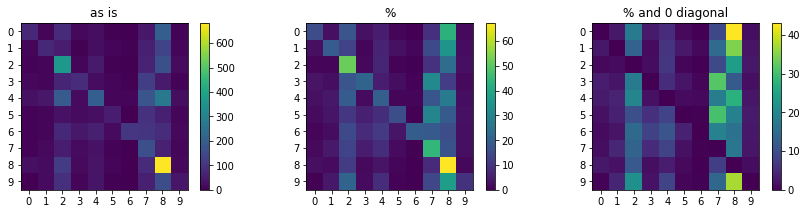

In [59]:
print('K-N-N Confusion Matrix:')

# the types appear in this order
print('\n', sorted(np.unique(y_test)))

plot_confusion_matrix(knn_cmx)

O algoritmo KNN não obteve bons resultados para essa classificação, conseguimos encontrar uma alta taxa de erro, mais de 80% destes concentrados nos grupos de animais do tipo ovelha e aranha, conseguimos identificar na matriz de confusão que muitas ovelhas foram confundidas com elefantes e vacas, e muitas aranhas foram confundidas com diversos animais.

Até o momento o resultado me leva a acreditar que a qualidade das imagens e outros ruidos, como fundo, pessoas e objetos, sao a causa principal da baixa acuracia.

## SGD
O classificador SGD nos da um resultado proximo do que seria obtido por um algoritmo clasificador linear como o SVM. Utilizando o método do gradiente, um método numérico utilizado em optimização que encontra um ponto minimo de uma função a partir de um esquema iterativo, onde em cada passo se toma uma direção negativa do gradiente.

Treinamos este algoritmo rapidamente.

In [60]:
sgd_clf = SGDClassifier(n_jobs=mp.cpu_count())
sgd_clf.fit(X_train_prepared, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=32, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

Ao executar o algoritmo treinado dessa vez obtemos um aumento na acuracia de aproximadamente 15% na predição das imagens de teste, o algoritmo foi capaz de predizer 46.83% das imagens corretamente. Este resultado ainda nao atingiu minhas espectativas.

In [61]:
y_pred = sgd_clf.predict(X_test_prepared)
print(np.array(y_pred == y_test)[:25])
print('')
print('Accuracy: ', 100*np.sum(y_pred == y_test)/len(y_test))

[ True False  True  True False  True False  True False False  True False
 False False False False  True False False  True False False False False
 False]

Accuracy:  46.834099752387694


Da mesma maneira que para o algoritmo anterior construimos uma matriz de confusão representando os animais: borboleta, gato, galinha, vaca, cachoroo, elefante, cavalo, ovelha, aranha e esquilo. 

In [62]:
print('SGD Confusion Matrix:')
sgd_cmx = confusion_matrix(y_test, y_pred)
print(sgd_cmx)

SGD Confusion Matrix:
[[220  25  26   9  30   8   9   8 128  19]
 [ 21 134  28  20  65  12  11  12  72  21]
 [ 25  30 398  32  61   6  27  29  52  40]
 [  4   5  32 187  55  25  37  32  15   8]
 [ 22  52 139  62 446  47  91  36  62  45]
 [ 12   4  10  44  36 128  28  28  13  18]
 [  2  10  22  63  83  33 277  13  30   4]
 [  3  13  40  69  31  27  16 133  27  14]
 [ 65  48  90  25  68  12  19  34 592  61]
 [ 16  29  74  18  60  12   9  21  57 133]]


## Comparação entre K-N-N e SGD
Comparando as matrizes de confusão geradas pela predição dos algoritmos K-N-N e SGD conseguimos identificar erros mais distribuidos e maior quantidade de acertos para o algoritmo SGD, também é possivel notar que os erros mais comuns do algoritmo K-N-N ainda se encontram no algoritmo SGD em menor escala.

SGD Confusion Matrix:

 ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


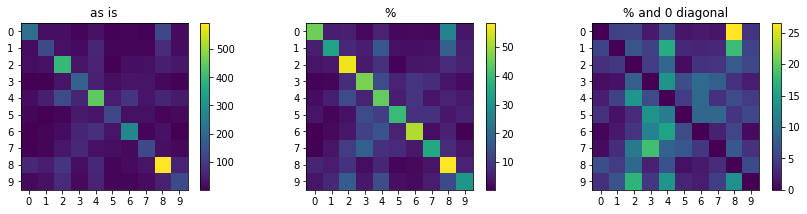

In [63]:
print('SGD Confusion Matrix:')

# the types appear in this order
print('\n', sorted(np.unique(y_test)))

plot_confusion_matrix(sgd_cmx)

K-N-N Confusion Matrix:

 ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


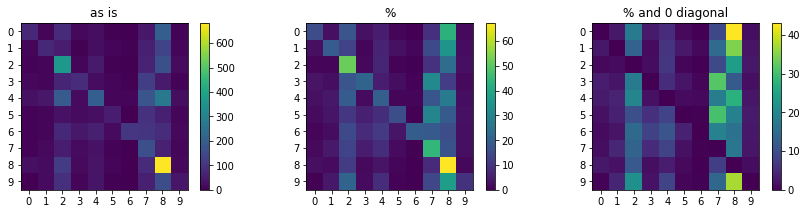

In [64]:
print('K-N-N Confusion Matrix:')

# the types appear in this order
print('\n', sorted(np.unique(y_test)))

plot_confusion_matrix(knn_cmx)

## SVC
O classificador SVC utiliza maquinas de vetores de suporte em conjunto com uma constante C para definir a distancia entre seus vetores, aumentando ou diminuindo a margem de erro.

Para treinar este algoritmo precisamos executar o proximo bloco por aproximadamente 15 horas.

In [67]:
svc_clf = svm.SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
svc_clf.fit(X_train_prepared, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Após tanta espera, os resultados obtidos pelo SVC foram ainda piores do que os obtidos pelo SGD que levou poucom mais de um minuto para ser treinado.

In [68]:
y_pred = svc_clf.predict(X_test_prepared)
print(np.array(y_pred == y_test)[:25])
print('')
print('Accuracy: ', 100*np.sum(y_pred == y_test)/len(y_test))

[ True False False  True False  True False  True False False  True  True
 False False False False  True False False  True False False False False
 False]

Accuracy:  45.666784577290414


Da mesma maneira que para os dois ultimos algoritmos, construimos uma matriz de confusão.

In [69]:
print('SVC Confusion Matrix:')
svc_cmx = confusion_matrix(y_test, y_pred)
print(svc_cmx)

SVC Confusion Matrix:
[[258  32  28   7  29   5   7   5 101  10]
 [ 26 184  28   8  51   6  15   6  58  14]
 [ 30  36 401  22  75   9  23  26  41  37]
 [ 11  12  29 188  46  22  41  35  11   5]
 [ 43 101 140  72 378  37  82  46  59  44]
 [  8   7  18  44  40 127  28  28  10  11]
 [  9  15  34  65  77  32 270  15  15   5]
 [  8  18  40  66  31  26  20 134  21   9]
 [126  59  83  26  72  24  28  32 521  43]
 [ 21  44  71  10  62  17   6  24  53 121]]


### Comparação entre SGD e SVC
Dessa vez comparamos as matrizes de confusão dos algoritmos SGD e SVC e podemos concluir que seus resultados sao realmente muito proximos, o algoritmo SGD é aproximadamente 1% melhor do que o SVC neste caso, ambos ainda possuem os mesmos erros acentuados que encontramos na matriz de confusão do algoritmo K-N-N em muito maior quantidade.  

SVC Confusion Matrix:

 ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


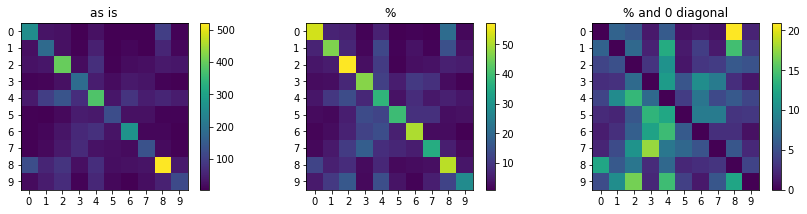

In [70]:
print('SVC Confusion Matrix:')

# the types appear in this order
print('\n', sorted(np.unique(y_test)))

plot_confusion_matrix(svc_cmx)

SGD Confusion Matrix:

 ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


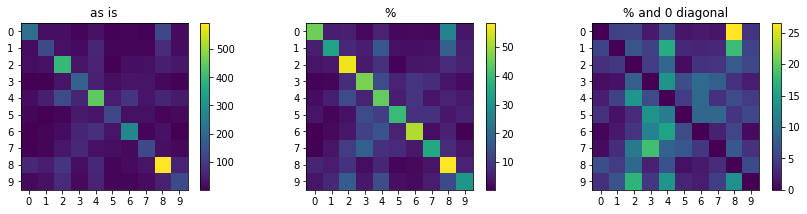

In [71]:
print('SGD Confusion Matrix:')

# the types appear in this order
print('\n', sorted(np.unique(y_test)))

plot_confusion_matrix(sgd_cmx)

# Conclusões e Trabalhos Futuros
Nenhum dos classificadores utilizados na pesquisa atingiu minhas espectativas, de acordo com os resultados obtidos conseguimos observar que o histograma de gradientes orientados quando utilizado como o unico método para extrair caractereisticas da imagem não traz bons resultados para a classificação de imagens. Seria interessante em um proximo projeto comparar a performance destes mesmos algoritmos utilizando um numero maior métodos para extrair uma maior quantidade de informações da imagem como cor e textura para compor os dados de categorização, dessa maneira seria possivel verificar o impacto que os outros dados da imagem causam no resultado final, também poderia ser medido o impacto da remoção de ruidos durante o pré-processamento.  
A falta de caracteristicas para descrever a imagem e a alta quantidade de ruido foram as causas principais para a baixa acuracia dos algoritmos, o histograma de gradientes orientados é o suficiente para nos dizer se existe ou não um animal na imagem, entretanto faltam informações para que ele possa nos dizer qual animal esta presente na imagem.

## Agradecimentos
Prof. Leandro de Castro

## Referências

KNN Classification using Scikit-learn. *Disponível em:*  
https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn *Acesso em: 20 Nov*

sklearn.neighbors.KNeighborsClassifier. *Disponível em:*  
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html *Acesso em: 20 Nov*

sklearn.svm.SVC. *Disponível em:*  
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html *Acesso em: 20 Nov*

Stochastic Gradient Descent. *Disponível em:*  
https://scikit-learn.org/stable/modules/sgd.html *Acesso em: 20 Nov*

Chapter 2 : SVM (Support Vector Machine) — Theory. *Disponível em:*  
https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72 *Acesso em: 20 Nov*

Chapter 2 : SVM (Support Vector Machine) — Coding. *Disponível em:*  
https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-coding-edd8f1cf8f2d *Acesso em: 20 Nov*

ML Practicum: Image Classification. *Disponível em:*  
https://developers.google.com/machine-learning/practica/image-classification/ *Acesso em: 20 Nov*

TUTORIAL: IMAGE CLASSIFICATION WITH SCIKIT-LEARN. *Disponível em:*  
https://kapernikov.com/tutorial-image-classification-with-scikit-learn/ *Acesso em: 20 Nov*

Histogram of Oriented Gradients. *Disponível em:*  
https://www.learnopencv.com/histogram-of-oriented-gradients/ *Acesso em: 20 Nov*

Vehicle Detection with HOG and Linear SVM. *Disponível em:*  
https://towardsdatascience.com/vehicles-tracking-with-hog-and-linear-svm-c9f27eaf521a *Acesso em: 20 Nov*

Histogram of Oriented Gradients and Object Detection. *Disponível em:*  
https://www.pyimagesearch.com/2014/11/10/histogram-oriented-gradients-object-detection/ *Acesso em: 20 Nov*